# Diabetes Prediction System Project

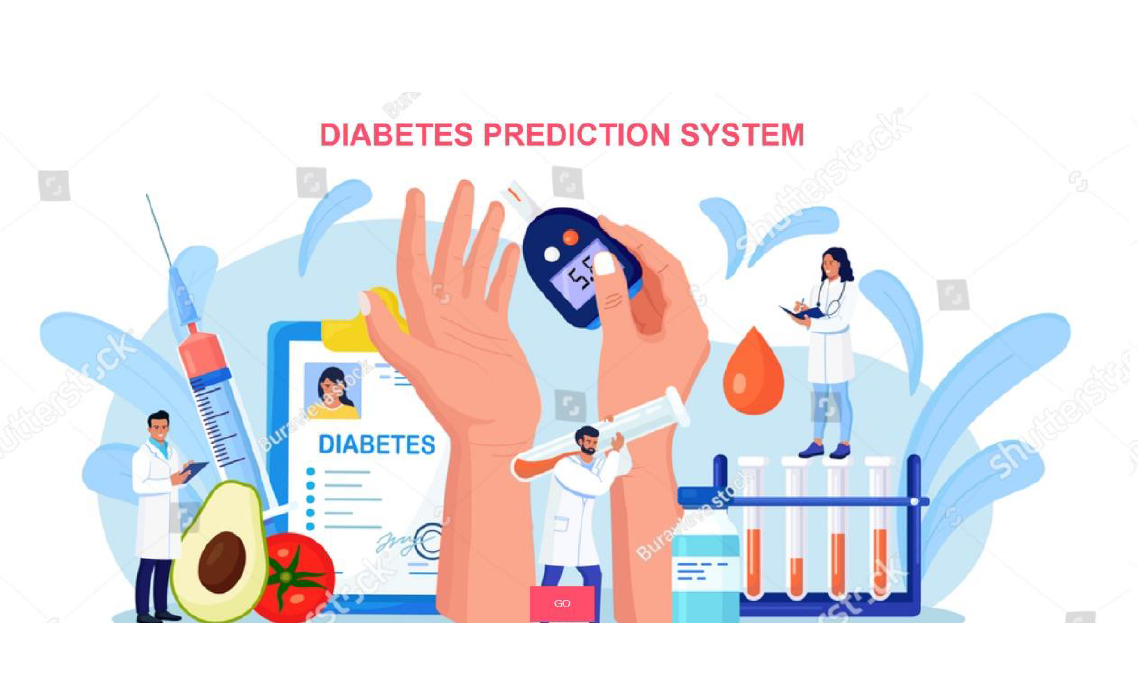

In [8]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Important Library for prediction


In [9]:
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




# loading the Data set

In [11]:
Hombs=pd.read_csv("C:/Users/DELL/Desktop/Data Analytics/diabetes.csv")

# Looking at the structure of the dataset using Head & Tail of 5 rows

In [12]:
Hombs.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
Hombs.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [31]:
print(Hombs.shape)

(768, 9)


# Checking the missing Values

In [30]:
Hombs.isnull() # checking if there is null value in the dataset-True means there is null value and false means no null values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


# Visualize the distribution of missing values using Heatmap

<Axes: >

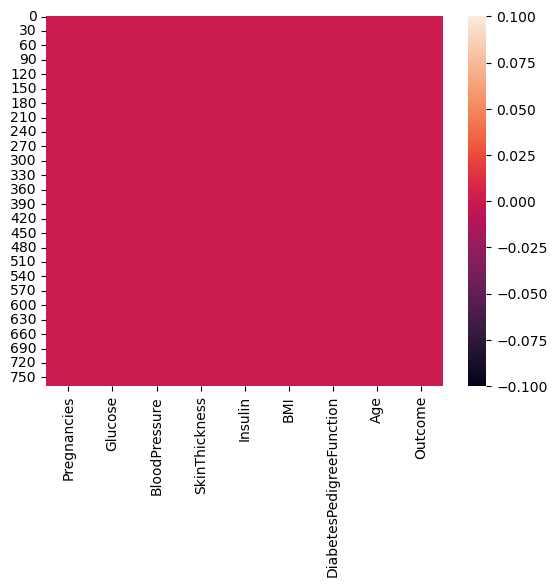

In [5]:
sns.heatmap(Hombs.isnull())

<Axes: >

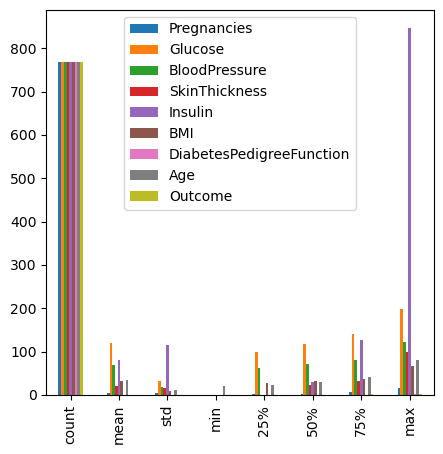

In [26]:
import pylab as plt
Hombs.describe().plot.bar(figsize = (5,5))

<Axes: xlabel='Outcome'>

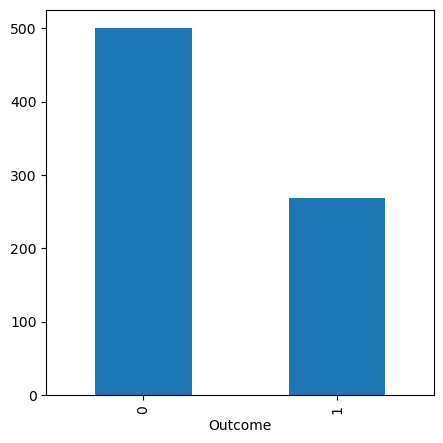

In [28]:
Hombs['Outcome'].value_counts().plot.bar(figsize =(5,5)) # to check the distribution of the outcome label

# Checking the Correlation

In [6]:
Correlation=Hombs.corr()
print(Correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Visualizing the correlation

<Axes: >

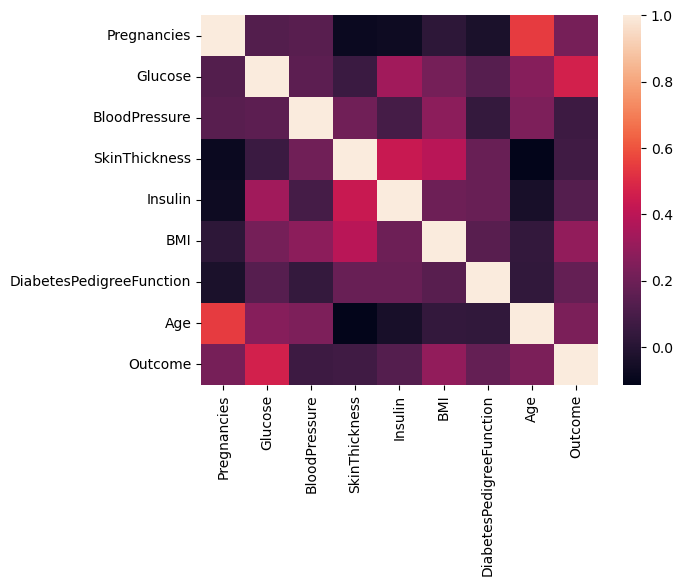

In [16]:
sns.heatmap(Hombs.corr())

# Now Lets build a model

In [13]:
X=Hombs.drop('Outcome',axis=1)  # we are droping the OUTCOME column because is the one with the classification labels
Y=Hombs['Outcome']              # 0 means there is no diabetes detected and 1 means diabetes detected
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)  # 80% training data and 20% testing data

# Train the model Using Logistic regression

In [14]:
model = LogisticRegression(solver='lbfgs', max_iter=1000) # solver='lbfgs', max_iter=1000- this statement helps to avoid convergence warning on iteration
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

# Making Prediction

In [15]:
prediction=model.predict(X_test)

In [16]:
print(prediction)

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1]


In [17]:
accuracy=accuracy_score(prediction,Y_test)


In [18]:
print(accuracy)

0.7532467532467533


# Train the model using random forest

In [32]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
								random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

In [39]:
HombsModel=RandomForestRegressor(random_state=0)

In [40]:
HombsModel.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

# Predicting  the model using Random forest

In [43]:
predict=HombsModel.predict(X_test)

In [44]:
print(predict)

[0.48 0.12 0.04 0.57 0.59 0.8  0.   0.16 0.93 0.47 0.05 0.45 0.02 0.26
 0.88 0.9  0.1  0.61 0.02 0.49 0.2  0.01 0.57 0.34 0.78 0.14 0.04 0.7
 0.02 0.   0.92 0.3  0.08 0.22 0.16 0.05 0.37 0.48 0.35 0.42 0.56 0.5
 0.59 0.18 0.73 0.52 0.71 0.   0.27 0.07 0.67 0.35 0.48 0.02 0.56 0.93
 0.63 0.87 0.88 0.05 0.81 0.9  0.69 0.69 0.04 0.72 0.47 0.15 0.52 0.88
 0.24 0.06 0.47 0.42 0.29 0.91 0.42 0.24 0.01 0.48 0.03 0.29 0.56 0.96
 0.17 0.04 0.03 0.33 0.13 0.1  0.63 0.68 0.63 0.43 0.69 0.61 0.26 0.71
 0.77 0.33 0.47 0.75 0.63 0.94 0.03 0.26 0.11 0.43 0.66 0.28 0.   0.
 0.   0.05 0.12 0.   0.02 0.06 0.63 0.22 0.68 0.09 0.52 0.71 0.55 0.04
 0.11 0.73 0.36 0.83 0.36 0.61 0.16 0.   0.82 0.63 0.05 0.01 0.74 0.64
 0.12 0.03 0.12 0.09 0.07 0.5  0.08 0.25 0.72 0.12 0.06 0.1  0.35 0.75]
